<a href="https://colab.research.google.com/github/MeeraOmar22/IR_Evaluation/blob/main/IR_Group_Project_MAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview of Precision and Average Precision

What is Precision, Average Precision:
- Precision measure the fraction of retrieved documents that are relevant.
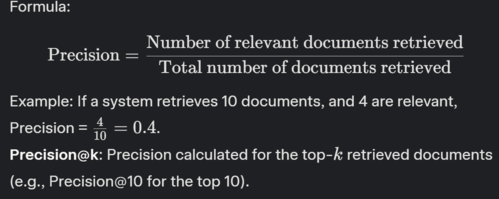

- Average Precision (AP), a metric that evaluates the quality of a ranked list of documents by averaging the precision at each position where a relevant document appears, normalized by the total number of relevant documents.
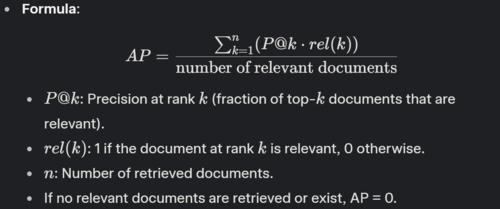

Key differences:
- Precision is a single value based on the entire retrieved set (or top-k).
- AP averages precision values only at the ranks of relevant documents, capturing the ranking quality across the list.
- Example:

  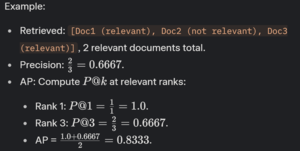

# Overview of Mean Average Precision (MAP)

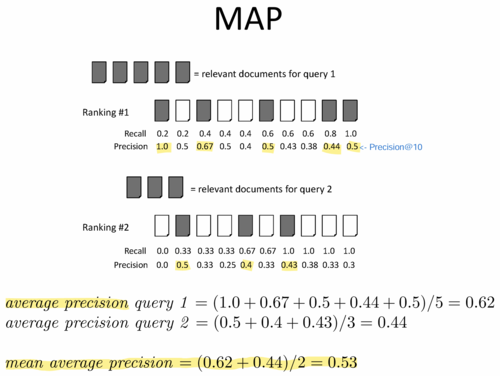

- summarise ranking from multiple queries by averaging average precision
- most commonly used measure in research papers
- assumes user is interested in finding many relevant documents for each query

MAP is a widely used metric in information retrieval to evaluate the effectiveness of a search system. It measures the quality of a ranked list of documents by considering both the **relevance of retrieved documents** and **their positions in the ranking**. Here’s a breakdown:

- Precision@k: For a given topic, precision@k is the fraction of the top-k retrieved documents that are relevant. For example, if 3 out of the top 5 documents are relevant, precision@5 = 3/5 = 0.6.

- Average Precision (AP): For a single topic, AP calculates the average of precision values at each position where a relevant document is retrieved, considering only the top-ranked documents up to a cutoff (or all retrieved documents).

- Mean Average Precision (MAP): MAP is the mean of AP scores across all topics for a system

# Overview of NDCG@10


# Data Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from glob import glob
import os

In [ ]:
drive_folder = '/content/drive/MyDrive/IR_Assignment/'

input_folder = os.path.join(drive_folder, 'set4')
qrels_file = os.path.join(input_folder, 'qrels.trec8.adhoc')
input_files_pattern = os.path.join(input_folder, 'input.*')

output_folder = os.path.join(drive_folder, 'csv_files')

In [ ]:
# Convert qrels file to csv
qrels_df = pd.read_csv(qrels_file, sep='\s+', header=None,
                       names=['topic_id', 'placeholder', 'doc_id','relevance'])
qrels_csv_path = os.path.join(output_folder, 'qrels.csv')
qrels_df.to_csv(qrels_csv_path, index=False)
print(f"Qrels file converted to {qrels_csv_path}")

Qrels file converted to /content/drive/MyDrive/IR_Assignment/csv_files/qrels.csv


In [ ]:
# Convert input files to csv
input_files = glob(input_files_pattern)
combined_input_data = []

for file_path in input_files:
  system_name = os.path.basename(file_path).split('input.')[1]
  df = pd.read_csv(file_path, sep='\s+', header=None,
                   names=['topic_id', 'q0', 'doc_id', 'rank', 'score', 'system'])

  # Save individual csv
  input_csv_path = os.path.join(output_folder, f'input_{system_name}.csv')
  df.to_csv(input_csv_path, index=False)
  print(f"Input file {file_path} converted to {input_csv_path}")
  combined_input_data.append(df)

# Combine all input files into one csv
combined_df = pd.concat(combined_input_data, ignore_index=True)
combined_csv_path = os.path.join(output_folder, 'all_input.csv')
combined_df.to_csv(combined_csv_path, index=False)
print(f"All input files combined into {combined_csv_path}")

Input file /content/drive/MyDrive/IR_Assignment/set4/input.ibmg99c converted to /content/drive/MyDrive/IR_Assignment/csv_files/input_ibmg99c.csv
Input file /content/drive/MyDrive/IR_Assignment/set4/input.plt8ah5 converted to /content/drive/MyDrive/IR_Assignment/csv_files/input_plt8ah5.csv
Input file /content/drive/MyDrive/IR_Assignment/set4/input.8manexT3D1N0 converted to /content/drive/MyDrive/IR_Assignment/csv_files/input_8manexT3D1N0.csv
Input file /content/drive/MyDrive/IR_Assignment/set4/input.Flab8at converted to /content/drive/MyDrive/IR_Assignment/csv_files/input_Flab8at.csv
Input file /content/drive/MyDrive/IR_Assignment/set4/input.Mer8Adtnd3 converted to /content/drive/MyDrive/IR_Assignment/csv_files/input_Mer8Adtnd3.csv
Input file /content/drive/MyDrive/IR_Assignment/set4/input.iit99ma1 converted to /content/drive/MyDrive/IR_Assignment/csv_files/input_iit99ma1.csv
Input file /content/drive/MyDrive/IR_Assignment/set4/input.mds08a2 converted to /content/drive/MyDrive/IR_Assign

In [ ]:
# Create qrels dictionary for relevance lookup
qrels_dict = {}
for topic_id in qrels_df['topic_id'].unique(): # iterate over unique topic IDs in the qrels df
  topic_qrels = qrels_df[qrels_df['topic_id'] == topic_id] # filter the qrels df to rows for the current topic
  relevant_docs = set(topic_qrels[topic_qrels['relevance'] == 1]['doc_id']) # create a set of documents IDs with relevance==1

  # For each topic, store the, set of relevant document IDs, and number of relevant documents
  qrels_dict[topic_id] = {'relevant_docs': relevant_docs,
                          'num_relevant': len(relevant_docs)}

print("qrels_dict Contents:")
for topic_id, info in qrels_dict.items():
    print(f"Topic {topic_id}:")
    print(f"  Relevant Documents: {info['relevant_docs']}")
    print(f"  Number of Relevant Documents: {info['num_relevant']}")

qrels_dict Contents:
Topic 401:
  Relevant Documents: {'FT934-17339', 'FBIS4-65539', 'FT923-6362', 'LA080989-0052', 'FBIS4-18642', 'FBIS4-65444', 'FBIS4-42388', 'FBIS3-20188', 'FBIS3-58103', 'FBIS4-19744', 'FBIS3-60884', 'FT924-15445', 'FBIS4-18593', 'FBIS3-39431', 'FT924-3197', 'LA100189-0189', 'FT922-14296', 'FBIS3-59128', 'FBIS4-18760', 'FT924-5373', 'FT944-9692', 'LA122490-0108', 'FT924-4955', 'FBIS4-18764', 'FT923-5655', 'FBIS4-19519', 'FT923-9388', 'FT922-14496', 'FBIS3-5864', 'FT934-11312', 'FBIS4-18670', 'FBIS3-20091', 'FT924-3284', 'FT924-5839', 'FBIS4-9068', 'FT932-2882', 'FT932-4849', 'FT923-10585', 'FT924-13800', 'FBIS4-65540', 'LA050789-0068', 'FT921-1808', 'FT932-10187', 'FBIS4-42631', 'FT911-2806', 'FT932-6660', 'FBIS3-19884', 'FT921-1807', 'FT924-4075', 'FT924-4952', 'FT944-9898', 'FBIS3-19895', 'FT921-634', 'FT922-14288', 'FT924-3665', 'FBIS3-57960', 'FT931-2176', 'FBIS3-39889', 'FT922-14939', 'FT932-4582', 'FBIS4-65680', 'FBIS3-60975', 'FT924-14321', 'FBIS4-19238', 'F

# Compute AP and MAP

In [ ]:
# Function to compute average precision (AP)
def compute_ap(ranked_docs, relevant_docs, num_relevant):
  if num_relevant == 0:  # No relevant documents for this topic
    return 0.0
  precision_sum = 0.0
  relevant_count = 0
  for i, doc_id in enumerate(ranked_docs, 1):
    if doc_id in relevant_docs:
      relevant_count += 1
      precision = relevant_count / i
      precision_sum += precision
  if relevant_count == 0:  # No relevant documents retrieved
    return 0.0
  return precision_sum / num_relevant

In [ ]:
# Compute AP for each topic and system
systems = combined_df['system'].unique()
topics = qrels_df['topic_id'].unique()
ap_matrix = {topic: {system: 0.0 for system in systems} for topic in topics}

for system in systems:
  system_df = combined_df[combined_df['system'] == system]
  for topic in topics:
    topic_data = system_df[system_df['topic_id'] == topic].sort_values('rank')
    ranked_docs = topic_data['doc_id'].tolist()
    relevant_docs = qrels_dict.get(topic, {'relevant_docs': set(), 'num_relevant': 0})['relevant_docs']
    num_relevant = qrels_dict.get(topic, {'relevant_docs': set(), 'num_relevant': 0})['num_relevant']
    ap = compute_ap(ranked_docs, relevant_docs, num_relevant)
    ap_matrix[topic][system] = ap

In [ ]:
# Create results matrix (topics as rows, systems as columns)
matrix_df = pd.DataFrame(ap_matrix).T  # transpose to get topics as rows
matrix_df.columns = systems # set the column names of matrix_df to the list of system names
matrix_df.index.name = 'topic_id'

# Add MAP per system (mean AP across all topics (rows) for each system)
map_per_system = matrix_df.mean() # column-wise mean to get MAP per system
matrix_df.loc['MAP_per_system'] = map_per_system

# Add MAP per topic (mean AP across all systems (columns) for each topic)
matrix_df['MAP_per_topic'] = matrix_df.mean(axis=1)  # row-wise mean to get MAP per topic

# Save results to CSV in Google Drive
matrix_csv_path = os.path.join(output_folder, 'map_matrix.csv')
matrix_df.to_csv(matrix_csv_path)
print("\nMAP Matrix (topics as rows, systems as columns):")
print(matrix_df)

# Save MAP per system separately
map_df = pd.DataFrame({'system': systems, 'MAP': map_per_system})
map_csv_path = os.path.join(output_folder, 'map_per_system.csv')
map_df.to_csv(map_csv_path, index=False)
print("\nMAP per System:")
print(map_df)


MAP Matrix (topics as rows, systems as columns):
                 ibmg99c   plt8ah5  8manexT3D1N0   Flab8at  Mer8Adtnd3  \
topic_id                                                                 
401             0.003907  0.004737      0.471107  0.020603    0.103521   
402             0.162856  0.176551      0.251528  0.196749    0.401199   
403             0.625363  0.713809      0.881665  0.845268    0.463323   
404             0.122225  0.193795      0.212262  0.168615    0.230024   
405             0.062935  0.090845      0.337989  0.174593    0.131724   
406             0.206188  0.240752      0.507419  0.454965    0.286539   
407             0.083756  0.134197      0.316043  0.434617    0.237898   
408             0.137505  0.218805      0.232357  0.189239    0.248463   
409             0.044154  0.178662      0.301015  0.137225    0.225667   
410             0.860605  0.002537      0.715282  0.889134    0.795009   
411             0.179154  0.091817      0.418081  0.296982    

- MAP per system: Represents the overall performance of each system, averaged over all topics. It’s critical for comparing systems.
- MAP per topic: Shows the average performance across systems for each topic. This is optional but useful for analyzing topic difficulty or system consistency.

In [ ]:
!pip install seaborn

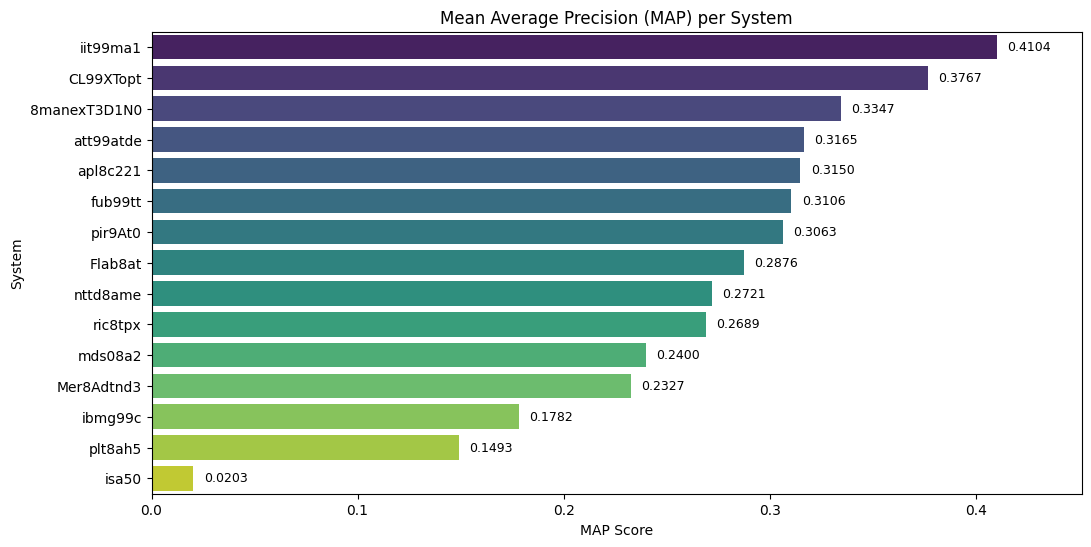

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Sort map_df by MAP values
map_df_sorted = map_df.sort_values(by='MAP', ascending=False)

# Plot styling
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(y='system', x='MAP', data=map_df_sorted, palette='viridis', hue='system', legend=False)

# Customise plot
plt.xlabel('MAP Score')
plt.ylabel('System')
plt.title('Mean Average Precision (MAP) per System')
plt.xlim(0, map_df_sorted['MAP'].max() * 1.1)

# Add value labels next to bars
for i, v in enumerate(map_df_sorted['MAP']):
  plt.text(v + 0.005, i, f'{v:.4f}', va='center', fontsize=9)

# Display plot
plt.show()

# P@10

In [ ]:
import pandas as pd
import numpy as np
import os

# Assuming qrels_df, combined_df, qrels_dict, and output_folder are already defined
# from your previous code

# Function to compute Precision@10
def compute_p10(ranked_docs, relevant_docs):
  top10_docs = ranked_docs[:10]  # Take top 10 documents
  relevant_count = len([doc for doc in top10_docs if doc in relevant_docs])
  return relevant_count / 10.0

# Compute P@10 for each topic and system
systems = combined_df['system'].unique()
topics = qrels_df['topic_id'].unique()
p10_matrix = {topic: {system: 0.0 for system in systems} for topic in topics}

for system in systems:
  system_df = combined_df[combined_df['system'] == system]
  for topic in topics:
    topic_data = system_df[system_df['topic_id'] == topic].sort_values('rank')
    ranked_docs = topic_data['doc_id'].tolist()
    relevant_docs = qrels_dict.get(topic, {'relevant_docs': set(), 'num_relevant': 0})['relevant_docs']
    p10 = compute_p10(ranked_docs, relevant_docs)
    p10_matrix[topic][system] = p10

# Create P@10 results matrix (topics as rows, systems as columns)
p10_matrix_df = pd.DataFrame(p10_matrix).T  # Transpose to get topics as rows
p10_matrix_df.columns = systems
p10_matrix_df.index.name = 'topic_id'

# Add P@10 per system (mean P@10 across all topics)
p10_per_system = p10_matrix_df.mean()
p10_matrix_df.loc['P@10_per_system'] = p10_per_system

# Save P@10 matrix to CSV
p10_matrix_csv_path = os.path.join(output_folder, 'p10_matrix.csv')
p10_matrix_df.to_csv(p10_matrix_csv_path)
print("\nP@10 Matrix (topics as rows, systems as columns):")
print(p10_matrix_df)

# Save P@10 per system separately
p10_df = pd.DataFrame({'system': systems, 'P@10': p10_per_system})
p10_csv_path = os.path.join(output_folder, 'p10_per_system.csv')
p10_df.to_csv(p10_csv_path, index=False)
print("\nP@10 per System:")
print(p10_df)


P@10 Matrix (topics as rows, systems as columns):
                 ibmg99c  plt8ah5  8manexT3D1N0  Flab8at  Mer8Adtnd3  \
topic_id                                                               
401                0.000    0.000         1.000    0.200       0.600   
402                0.500    0.500         0.700    0.600       0.700   
403                0.800    0.900         1.000    0.900       0.500   
404                0.200    0.500         0.500    0.200       0.500   
405                0.200    0.300         0.600    0.500       0.400   
406                0.200    0.400         0.500    0.500       0.500   
407                0.100    0.600         0.800    0.900       0.700   
408                0.200    0.500         0.800    0.300       0.400   
409                0.000    0.300         0.500    0.200       0.300   
410                1.000    0.000         1.000    1.000       1.000   
411                0.400    0.200         0.800    0.500       0.600   
412          

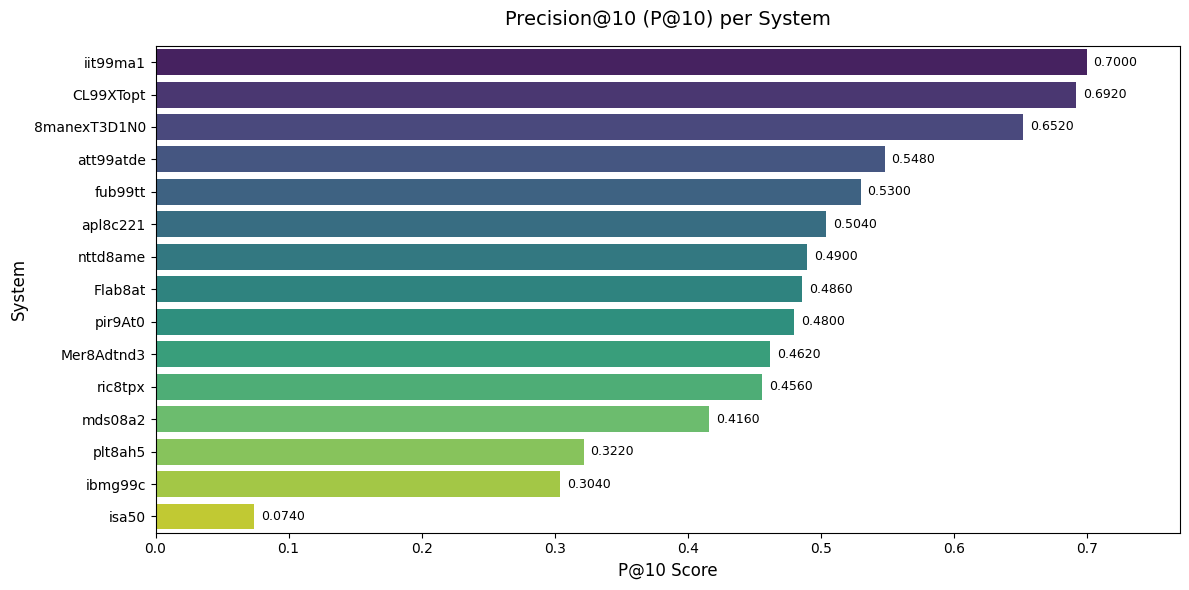

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Sort p10_df by P@10 for better visualization
p10_df_sorted = p10_df.sort_values(by='P@10', ascending=False)

# Set figure size
plt.figure(figsize=(12, 6))

# Create horizontal bar plot
sns.barplot(y='system', x='P@10', data=p10_df_sorted, palette='viridis', hue='system')

# Customize plot
plt.xlabel('P@10 Score', fontsize=12)
plt.ylabel('System', fontsize=12)
plt.title('Precision@10 (P@10) per System', fontsize=14, pad=15)
plt.xlim(0, p10_df_sorted['P@10'].max() * 1.1)  # Add space after max P@10
plt.tight_layout()

# Add value labels next to bars
for i, v in enumerate(p10_df_sorted['P@10']):
    plt.text(v + 0.005, i, f'{v:.4f}', va='center', fontsize=9)

# Display plot in Colab
plt.show()

# Correlation Coefficient

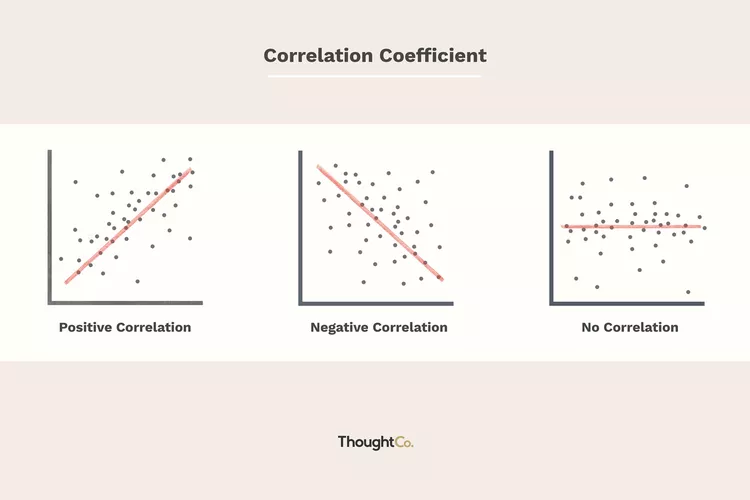

What is Correlation Coefficient
- Correlation coefficient measures the strength and direction of the relationship between two variables.
- For this assignment, it is performed to assess hwo similar the rankings of systems are when evaluated using P@10 versus MAP. High correlation means the two metrics rank systems similarly, while a low correlation indicates they produce different rankings.

Interpretation
- Range: -1 to 1
  - p≈1: Strong positive correlation (systems rank similarly under P@10 and MAP)
  - p≈-1: Strong negative correlation (opposite rankings)
  - p≈0: No correlation (rankings are unrelated)
- p-value: Tests if the correlation is statistically significant (p<0.05 indicates significance)

Why it matters
- A high correlation suggests that P@10 and MAP produce similar system rankings, implying the metrics are consistent in evaluating system performance
- A low correlation indicates the metrics prioritise different aspects of performance (eg. P@10 focuses on top-10 results while MAP considers all relevant documents)


In [ ]:
from scipy.stats import spearmanr, pearsonr
import pandas as pd
import os

# Merge p10_df and map_df on 'system' to ensure alignment
merged_df = pd.merge(p10_df, map_df, on='system', suffixes=('_P@10', '_MAP'))

# Extract P@10 and MAP scores
p10_scores = merged_df['P@10'].values
map_scores = merged_df['MAP'].values

# Compute Spearman correlation (for rankings)
spearman_corr, spearman_p = spearmanr(p10_scores, map_scores)
print(f"Spearman Correlation: {spearman_corr:.4f}, p-value: {spearman_p:.4f}")

# Compute Pearson correlation (for raw scores)
pearson_corr, pearson_p = pearsonr(p10_scores, map_scores)
print(f"Pearson Correlation: {pearson_corr:.4f}, p-value: {pearson_p:.4f}")

# Save correlation results to CSV
correlation_results = pd.DataFrame({
  'Metric': ['Spearman', 'Pearson'],
  'Correlation': [spearman_corr, pearson_corr],
  'P-value': [spearman_p, pearson_p]
})
correlation_csv_path = os.path.join(output_folder, 'correlation_results.csv')
correlation_results.to_csv(correlation_csv_path, index=False)
print(f"\nCorrelation results saved to {correlation_csv_path}")
print(correlation_results)

Spearman Correlation: 0.9679, p-value: 0.0000
Pearson Correlation: 0.9752, p-value: 0.0000

Correlation results saved to /content/drive/MyDrive/IR_Assignment/csv_files/correlation_results.csv
     Metric  Correlation       P-value
0  Spearman     0.967857  3.596536e-09
1   Pearson     0.975242  6.709515e-10


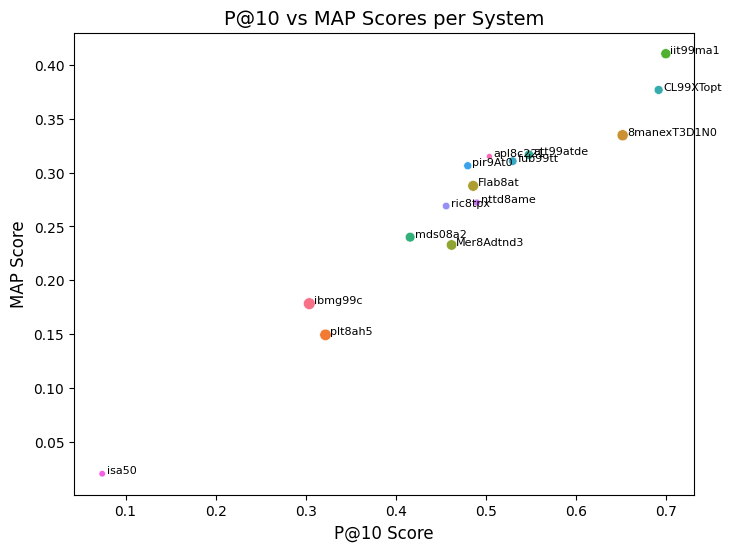

In [ ]:
# Visualize correlation with a scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='P@10', y='MAP', data=merged_df, hue='system', size='system', legend=False)
plt.title('P@10 vs MAP Scores per System', fontsize=14)
plt.xlabel('P@10 Score', fontsize=12)
plt.ylabel('MAP Score', fontsize=12)

# Add system labels to points
for i, system in enumerate(merged_df['system']):
  plt.text(merged_df['P@10'].iloc[i] + 0.005, merged_df['MAP'].iloc[i], system, fontsize=8)

# Significance Testing

- Significance testing determines whether the performance difference between two systems (eg. their MAP scores across topics) is statistically significant or due to chance.
- It is to identify which pairs of systems have significantly different performance (p<0.05), indicating that one system is reliably better than another.